Mean Squared Error: 31.250000000000018
R-squared: -124.00000000000007


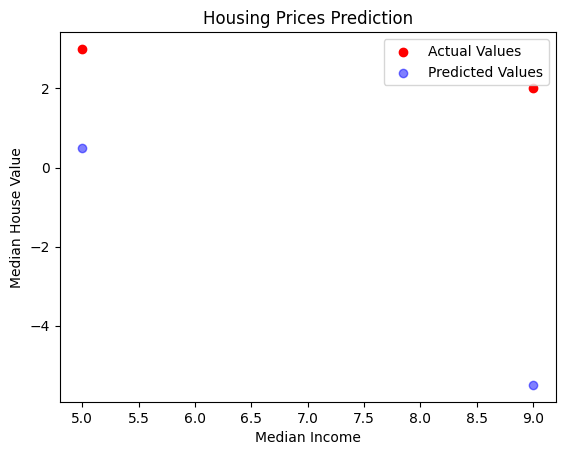

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

x_data=np.array([5, 9, 4, 1, 5])
x_Data = np.array([5, 9, 4, 1, 5]).reshape(-1, 1)  # Reshaped to ensure it is 2D
y_Data = np.array([2, 2, 0, 7, 3])

X = x_Data
y = y_Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

if len(y_test) > 1:
    r2 = r2_score(y_test, y_pred)
else:
    r2 = float('nan')  
    
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(X_test, y_test, color='red', label='Actual Values')
plt.scatter(X_test, y_pred, color='blue', label='Predicted Values', alpha=0.5)
plt.title('Housing Prices Prediction')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()



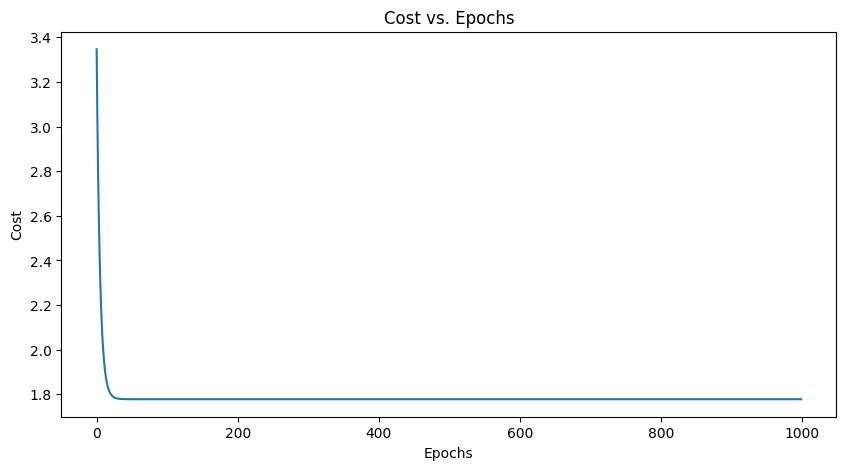

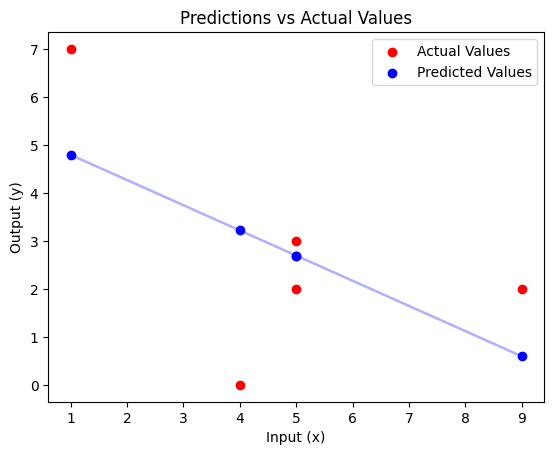

Final weight (w): -1.3431
Final bias (b): 2.8000
Final cost: 1.7780


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_cost(x, y, w, b):
    
    m = len(x)
    total_cost = np.sum((w * x + b - y) ** 2)
    return total_cost / (2 * m)

def calculate_gradients(x, y, w, b):
    
    m = len(x)
    dw = np.sum((w * x + b - y) * x) / m  # Partial derivative for w
    db = np.sum(w * x + b - y) / m        # Partial derivative for b
    return dw, db

# Your original data
x = np.array([5, 9, 4, 1, 5])
y = np.array([2, 2, 0, 7, 3])

# Normalize x (standardization)
x_normalized = (x - np.mean(x)) / np.std(x)

# Initialize parameters
w = np.random.randn()  # Random initial weight
b = np.random.randn()  # Random initial bias
learning_rate = 0.1    # Alpha (learning rate)
epochs = 1000         # Number of iterations

# Lists to store cost history
cost_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    # Calculate current cost
    current_cost = calculate_cost(x_normalized, y, w, b)
    cost_history.append(current_cost)
    
    # Calculate gradients
    dw, db = calculate_gradients(x_normalized, y, w, b)
    
    # Update parameters using gradient descent equations:
    w = w - learning_rate * dw
    b = b - learning_rate * db

# Final predictions
final_predictions = w * x_normalized + b

# Visualization 1: Cost vs Epochs (Gradient Descent)
plt.figure(figsize=(10, 5))

plt.plot(cost_history)
plt.title('Cost vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

# Visualization 2: Final Predictions vs Actual Values
plt.scatter(x, y, color='red', label='Actual Values')
plt.scatter(x, final_predictions, color='blue', label='Predicted Values')
plt.plot(x, final_predictions, color='blue', alpha=0.3)
plt.title('Predictions vs Actual Values')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()

# Print final results
print(f"Final weight (w): {w:.4f}")
print(f"Final bias (b): {b:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")
